In [1]:
print('hello')

hello


In [2]:
import torch

In [3]:
torch.load('outputs/pop.pth')

['spoon',
 'silver',
 'kitchen',
 'wooden',
 'cuttingboards',
 'pots',
 'pans',
 'stockpots',
 'handles',
 'dutch',
 'sequin',
 'ducat',
 'jewelry',
 'tiara',
 'brooch',
 'ornament',
 'countertops',
 'slicing',
 'knives',
 'pepperoni',
 'garlic',
 'olive',
 'plank',
 'rafter',
 'joist',
 'needle',
 'color',
 'thread',
 'tulips',
 'dikes',
 'windmills',
 'estate',
 'riches',
 'coin',
 'turbine',
 'mill',
 'force',
 'tapemeasure',
 'fabricmarker',
 'seamripper',
 'generator',
 'propeller',
 'compressor',
 'quartz',
 'marble',
 'granite',
 'leaves',
 'mediterranean',
 'fruit',
 'jug',
 'pitcher',
 'cauldron',
 'illustration',
 'pen',
 'textile',
 'copper',
 'dime',
 'two-dollar',
 'rendering',
 'sketching',
 'painting',
 'bottle',
 'vase',
 'urn',
 'clippers',
 'seam',
 'snips',
 'apparatus',
 'instrument',
 'electricity',
 'renderingengine',
 'renderingservice',
 'renderingfarm',
 'shuttle',
 'bobbin',
 'spool',
 'basin',
 'kettle',
 'saucepan',
 'drawer',
 'lever',
 'handlebar',
 'mistl

In [85]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter

def render_open_eneded_graph(data_dir, out_png):
    pop = torch.load(f'{data_dir}/pop.pth')
    parent_data = torch.load(f'{data_dir}/parent_data.pth')
    nodes = {pop[0]: Node(pop[0])}

    for n in pop:
        if n in parent_data:
            # print(nodes)
            # print(f'{n}\'s parent: {parent_data[n]}')
            nodes[n] = Node(n, parent=nodes[parent_data[n]])
        

    DotExporter(nodes[pop[0]]).to_picture(out_png)
    

In [87]:
render_open_eneded_graph('outputs1', 'outputs1/graph.png')
render_open_eneded_graph('outputs2', 'outputs2/graph.png')
render_open_eneded_graph('outputs3', 'outputs3/graph.png')

render_open_eneded_graph('outputs_nlp1', 'outputs_nlp1/graph.png')
render_open_eneded_graph('outputs_nlp2', 'outputs_nlp2/graph.png')

In [2]:
import torch
import clip
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def calc_text_features(texts, normalize=True):
    x = clip.tokenize(texts).to(device)
    with torch.no_grad():
        x = model.encode_text(x).detach()
    if normalize:
        x = x/x.norm(dim=-1, keepdim=True)
    return x.detach().cpu()

In [122]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [126]:
def exp_smooth(x, alpha=.99):
    s = [x[0]]
    
    for xi in x[1:]:
        si = alpha*xi + (1-alpha)*s[-1]
        s.append(si)
    
    return np.array(s)
def render_divergence_graph(data_dir):
    pop = torch.load(f'{data_dir}/pop.pth')
    
    print(len(pop))
    x = calc_text_features(pop)
    print(x.shape)
    
    graph = []
    for i in tqdm(range(2, len(x))):
        a = x[:i]
        # print(a.shape)
        last = a[[-1]]
        rest = a[:-1]
        # print(last.shape)
        # print(rest.shape)

        graph.append(1.-(rest@last.T)[:, 0].max().item())

        # graph.append((a@a.T).mean().item())

    graph = np.array(graph)

    plt.figure(figsize=(20, 10))
    plt.suptitle('Open-Endedness', fontsize=50)
    plt.subplot(211)
    plt.ylabel('Newborn Novelty', fontsize=30)
    # plt.xlabel('Generation', fontsize=20)
    plt.plot(graph, label='original')
    plt.plot(exp_smooth(graph, .1), linewidth=5, label='exp smoothing')
    plt.legend()


    plt.subplot(212)
    a = np.cumsum(graph)
    plt.ylabel('Cumulative Sum', fontsize=30)
    plt.xlabel('Generation', fontsize=30)
    plt.xticks(fontsize=20)
    plt.plot(a, linewidth=2.)

    plt.text(.75*len(a), a.max()/2., s='ran out of GPT-3 calls...', fontsize=30, rotation=0)

    plt.tight_layout()

1305
torch.Size([1305, 512])


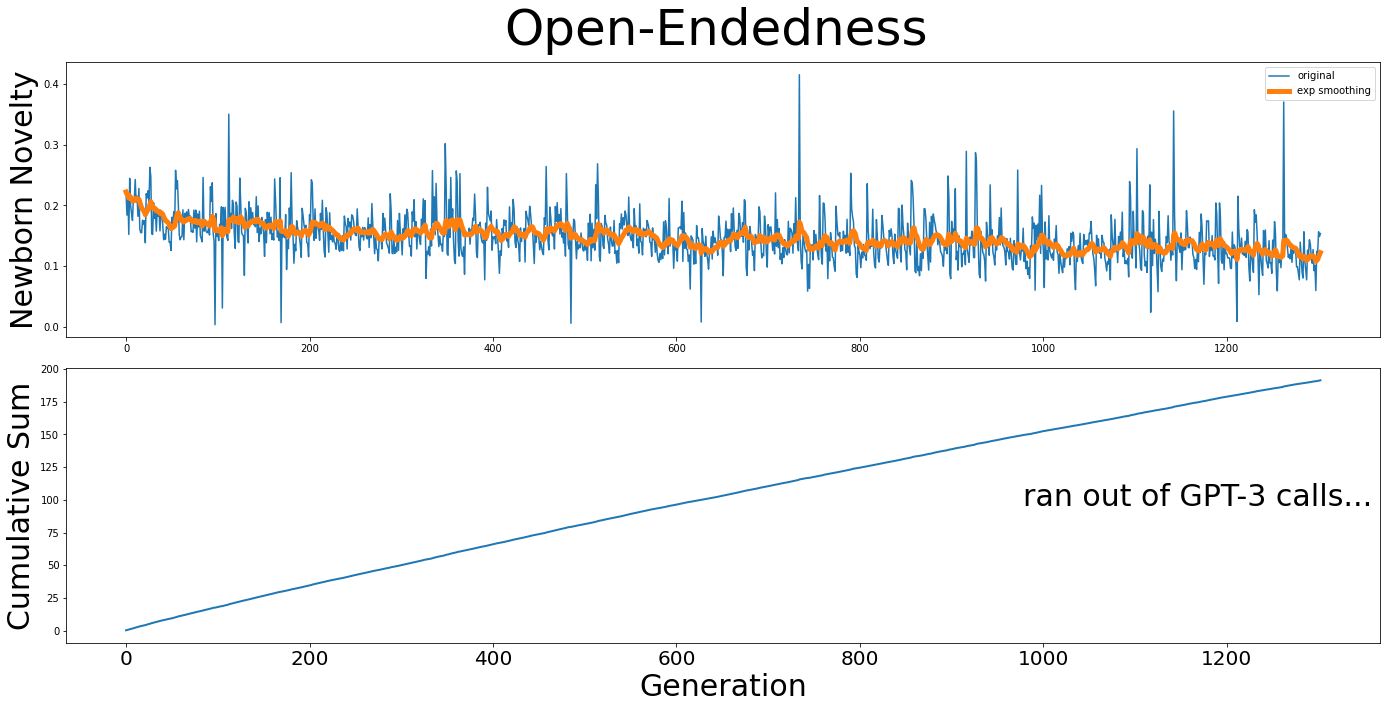

In [127]:
render_divergence_graph('outputs_nlp2')

545
torch.Size([545, 512])


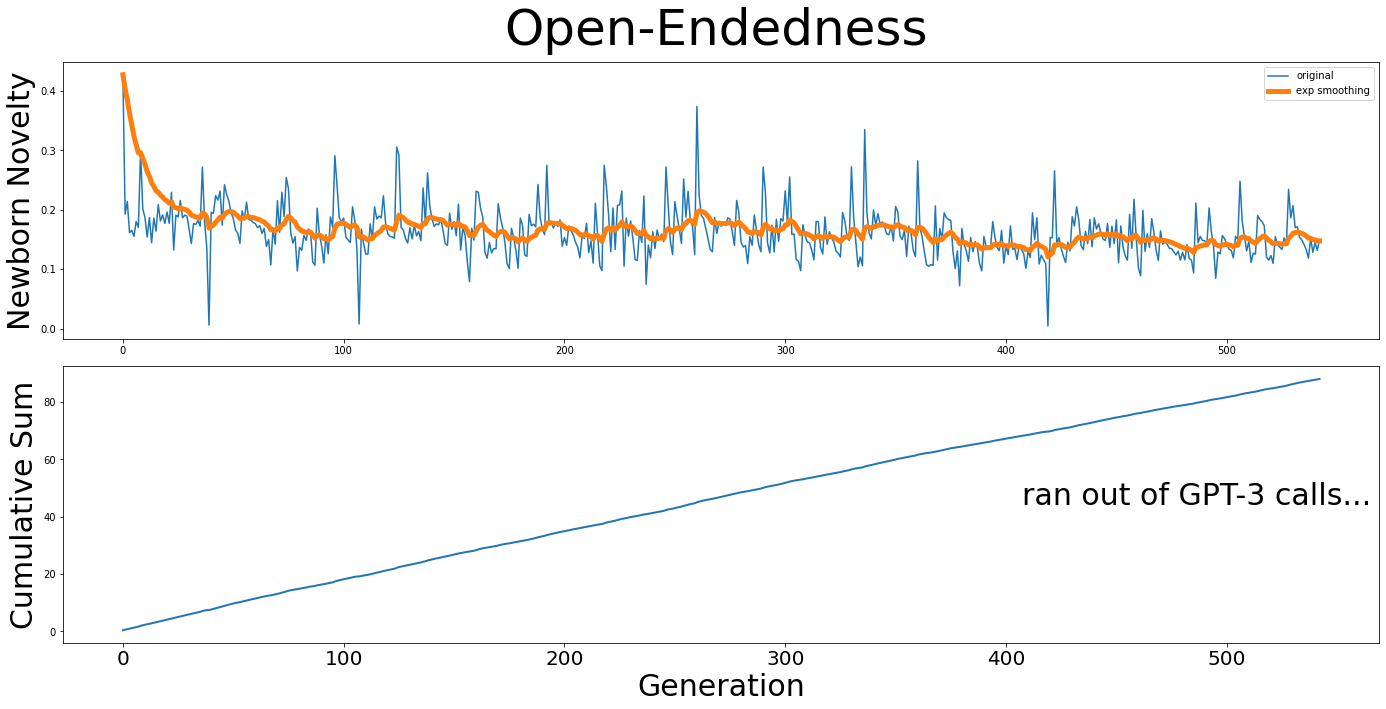

In [128]:

render_divergence_graph('outputs_nlp1')

94
torch.Size([94, 512])


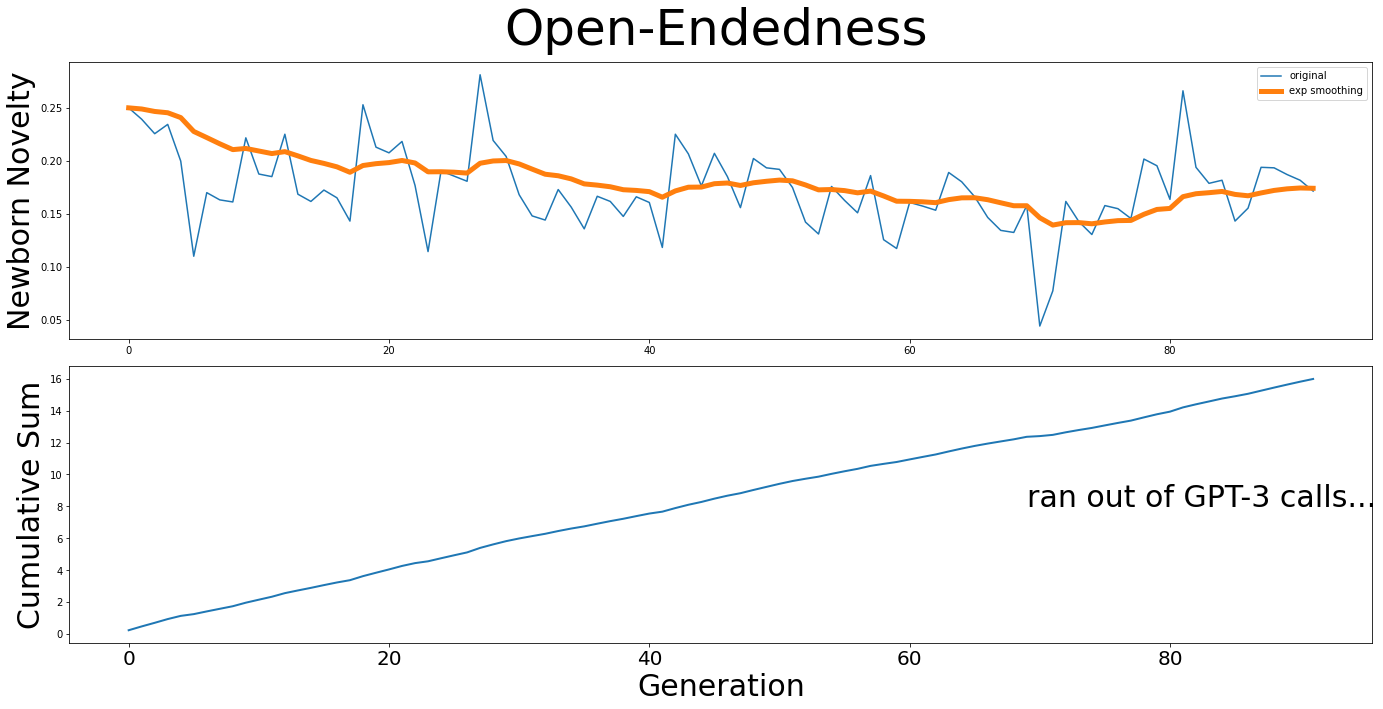

In [132]:

render_divergence_graph('outputs2')

In [135]:
import sklearn

In [136]:
from sklearn.manifold import TSNE

In [138]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)


In [139]:
x.shape

torch.Size([1305, 512])

In [141]:
a = tsne.fit_transform(x.numpy())

/work/08258/akumar01/maverick2/miniconda3/envs/evocraft/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/work/08258/akumar01/maverick2/miniconda3/envs/evocraft/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1305 samples in 0.001s...
[t-SNE] Computed neighbors for 1305 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1305
[t-SNE] Computed conditional probabilities for sample 1305 / 1305
[t-SNE] Mean sigma: 0.147973
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.715721
[t-SNE] KL divergence after 300 iterations: 2.574604


(-20.0, 20.0)

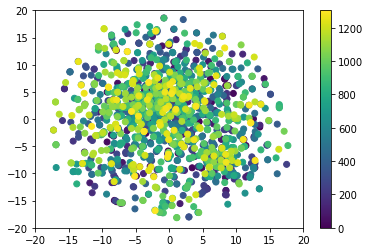

In [148]:
plt.scatter(*a.T, c=np.arange(len(a)))
plt.colorbar()
plt.ylim(-20, 20)
plt.xlim(-20, 20)

In [154]:
dists = x@x.T

In [174]:
graph = []
for i in tqdm(range(3, len(x))):
    distsi = dists[:i, :i]-torch.eye(i)
    graph.append((distsi).max(dim=-1).values.mean().item())



Text(0.5, 0, 'Generation')

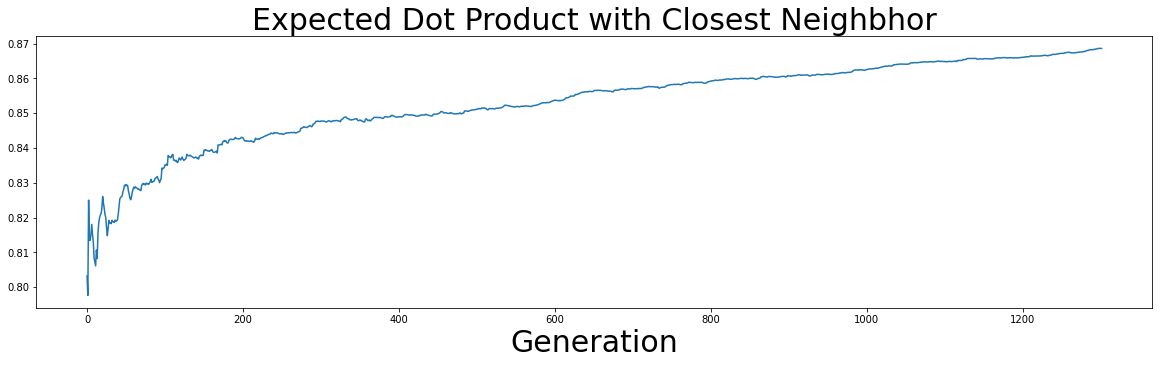

In [179]:
plt.figure(figsize=(20, 5))
plt.plot(graph)
plt.title('Expected Dot Product with Closest Neighbhor', fontsize=30)
plt.xlabel('Generation', fontsize=30)